#  Solutions to Exercises
Author: Rebekah Esmaili (rebekah.esmaili@gmail.com)
 
---

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from cartopy import crs as ccrs
import scipy.interpolate
import s3fs

# 1. Basic Data Analysis and Visualization

**Exercise 1:** Learning to use notebooks

1. Launch Jupyter Notebook and create a new notebook
2. Rename the notebook
3. Create a new cell and use *type()* to see if the following are floats and integers:
    * 2+2
    * 2\*2.0
    * var_float/var_int
---
**Solution:**

In [59]:
var_int = 8
var_float = 15.0

type(2+2), type(2*2.0), type(var_float/var_int)

(int, float, float)

**Exercise 2:** Import an ascii file

1. Import the dataset "20200901_20200930_Monterey.lev15.csv" and save it to a variable called *aeronet*.
2. Print the column names
3. Find a column that doesn't have only missing values (-999) and (challenge!) calculate the mean using the following syntax *variable\["column"\].mean()*
---
**Solution:**

In [60]:
fname = "data/20200901_20200930_Monterey.lev15.csv"
aeronet = pd.read_csv(fname, sep=',\s*', engine='python')

In [61]:
aeronet.head()

,Date(dd:mm:yyyy),Time(hh:mm:ss),Day_of_Year,Day_of_Year(Fraction),AOD_1640nm,AOD_1020nm,AOD_870nm,AOD_865nm,AOD_779nm,AOD_675nm,...,Exact_Wavelengths_of_AOD(um)_380nm,Exact_Wavelengths_of_AOD(um)_340nm,Exact_Wavelengths_of_PW(um)_935nm,Exact_Wavelengths_of_AOD(um)_681nm,Exact_Wavelengths_of_AOD(um)_709nm,Exact_Wavelengths_of_AOD(um)_Empty,Exact_Wavelengths_of_AOD(um)_Empty.1,Exact_Wavelengths_of_AOD(um)_Empty.2,Exact_Wavelengths_of_AOD(um)_Empty.3,Exact_Wavelengths_of_AOD(um)_Empty.4
0,0.071296,20:53:18,245,245.870347,0.061169,0.167012,0.238173,-999,-999,0.400838,...,0.3794,0.3409,0.9365,-999,-999,-999,-999,-999,-999,-999
1,0.071296,20:58:18,245,245.873819,0.061155,0.168417,0.239952,-999,-999,0.404648,...,0.3794,0.3409,0.9365,-999,-999,-999,-999,-999,-999,-999
2,0.071296,21:03:18,245,245.877292,0.063135,0.173143,0.246827,-999,-999,0.414668,...,0.3794,0.3409,0.9365,-999,-999,-999,-999,-999,-999,-999
3,0.071296,21:08:18,245,245.880764,0.061754,0.170541,0.241485,-999,-999,0.405998,...,0.3794,0.3409,0.9365,-999,-999,-999,-999,-999,-999,-999
4,0.071296,21:18:18,245,245.887708,0.059059,0.163919,0.232041,-999,-999,0.391191,...,0.3794,0.3409,0.9365,-999,-999,-999,-999,-999,-999,-999


In [62]:
aeronet["AOD_1640nm"].mean()

-1.7637041143410852

---
**Exercise 3:** Filtering data

Using the dataset imported in the previous example (*aeronet*):
    
1. Create a mask that filters the "AOD_870nm" column to only include values that are above 0.
2. Create a new variables, *day_of_year*, with the mask applied to aeronet\["Day_of_Year(Fraction)"\].
3. Create a new variables, *aod_870*, with the mask applied to aeronet\["AOD_870nm"\].
4. Compare the mean value of *aeronet\["AOD_870nm"\]* to *aod_870*.
    
---
**Solution**

In [63]:
mask_aod = (aeronet["AOD_870nm"] > 0 )

In [64]:
day_of_year = aeronet["Day_of_Year(Fraction)"][mask_aod]
aod_870 = aeronet["AOD_870nm"][mask_aod]

In [65]:
aeronet["AOD_870nm"].mean(), aod_870.mean()

(-0.3344563769379846, 0.6341813957322987)

---
**Exercise 4:** Create a scatterplot

Use the variables *aod_870* and *day_of_year* that you made in Exercise 3 to:

1. Create a scatter plot showing the *day_of_year* (x-axis) and *aod_870* (y-axis)
2. Add y-axis and x-axis labels using *.set_xlabel()* and *.set_ylabel()*
3. Adjust the color and size of the scatterplot

---
**Solution**

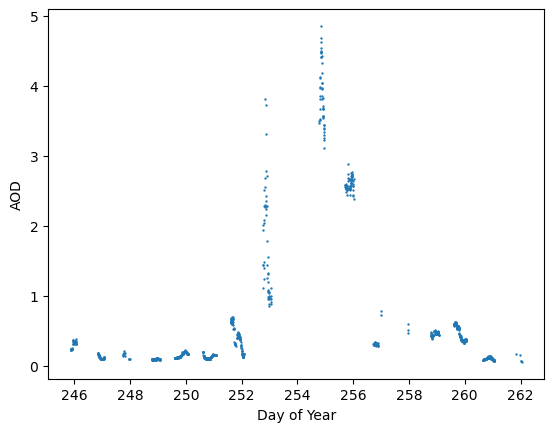

In [66]:
fig = plt.figure() 
ax = plt.subplot()
ax.scatter(day_of_year, aod_870, s=0.5)
ax.set_xlabel('Day of Year')
ax.set_ylabel('AOD')
plt.show()

# 2. Scientific Data Formats and Advanced Plotting

---
**Exercise 1**: Importing netCDF files
1. Open the file "MOP03JM-201811-L3V95.6.3_thinned.nc" using the xarray library
2. Print the variable names
3. What are the dimensions?
---

**Solution:**

In [67]:
fname = 'data/MOP03JM-201811-L3V95.6.3_thinned.nc' 
mop_file_id = xr.open_dataset(fname, engine='h5netcdf')

In [68]:
mop_file_id

<xarray.Dataset>
Dimensions:                    (YDim: 180, XDim: 360)
Dimensions without coordinates: YDim, XDim
Data variables:
    Latitude                   (YDim) float32 ...
    Longitude                  (XDim) float32 ...
    RetrievedCOTotalColumnDay  (XDim, YDim) float32 ...

---
**Exercise 2**: Plot 3-dimensional data

Plot *AOD_lat*, *AOD_lon*, and *AOD_500* (which we imported from the "JRR-AOD_v2r3_j01_..." netCDF file as:

1. Check the dimensions for all variables using *.shape*.
2. Do you need to generate a meshgrid with *np.meshgrid()*?
3. Create a contour plot

---
**Solution:**

In [69]:
fname='data/JRR-AOD_v2r3_j01_s202009152044026_e202009152045271_c202009152113150_thinned.nc'
aod_file_id = xr.open_dataset(fname, engine='h5netcdf')

AOD_550 = aod_file_id['AOD550']
AOD_lat = aod_file_id['Latitude']
AOD_lon = aod_file_id['Longitude']

In [70]:
AOD_lat.shape, AOD_lon.shape

((768, 3200), (768, 3200))

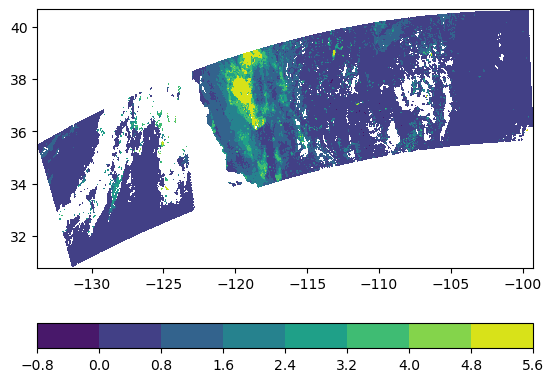

In [71]:
fig = plt.figure() 
ax = plt.subplot()
co_plot = ax.contourf(AOD_lon, AOD_lat, AOD_550)
fig.colorbar(co_plot, orientation='horizontal')
plt.show()

---
**Exercise 3** Adding maps to plots

Using *AOD_lat*, *AOD_lon*, and *AOD_550* (which we imported from the "JRR-AOD_v2r3_j01_..." netCDF file):

1. Create a *contourf* plot (same as Exercise 2)
2. Add the coastlines to a standard Plate Caree plot using *projection=* option.

---
**Solution**:

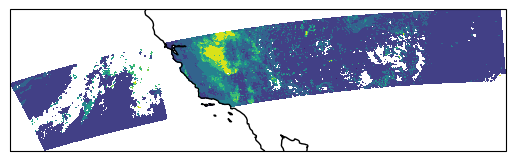

In [72]:
fig = plt.figure()
ax = plt.subplot(projection=ccrs.PlateCarree())

ax.contourf(AOD_lon, AOD_lat, AOD_550)

ax.coastlines('50m')
plt.show()